<a href="https://colab.research.google.com/github/LCaravaggio/RostrosClarin/blob/main/Dolar_en_Tapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re

import matplotlib.pyplot as plt

In [131]:
names=["id","unnamed", "file", "text"]
df = pd.read_csv("/content/Clarin.csv", encoding="latin-1", sep=";", names=names, header=1)
df['year'] = df['file'].astype(str).str[0:4]

In [144]:
years=range(1945,2022)
dolares=np.zeros(2022-1945)
data={'year': years, 'dolares':dolares}
df2=pd.DataFrame(data)

In [145]:
dol=0
tot=0
for row in range(0,27077):
  dol=0
  for a in df.text[row].split():
    a.replace("|", "")
    a.replace(",", "")
    a.replace(";", "")
    a.replace("*", "")
    a.replace("/", "")
    a.replace("=", "")
    a.replace("<", "")
    a.replace("$", "")
    a.replace("&", "")
    a.replace("(", "")
    a.replace(")", "")
    a.replace("!", "")
    a.replace("%", "")
    a.replace("@", "")
    a.replace("ó", "o")
    a.replace("Ó", "O")
    if a=="dolar": dol+=1
    if a=="DOLAR": dol+=1
    if a=="dolares": dol+=1
    if a=="DOLARES": dol+=1
    
    tot+=1
  df2.dolares[int(df.year[row])-1945]+=dol


print(str(tot))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


11729781


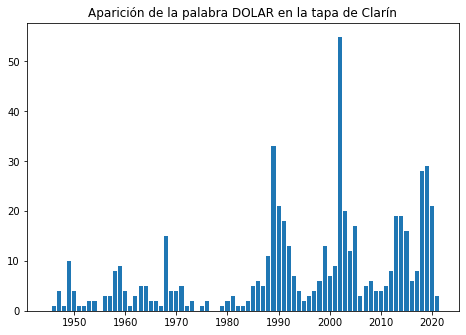

In [150]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
y = df2.year
dolares = df2.dolares
ax.bar(y,dolares)
plt.title('Aparición de la palabra DOLAR en la tapa de Clarín')
plt.show()